In [3]:
# vamos a importar las librerias de pandas  y las que necesitamos para poder realizar el respectivo tp
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

import matplotlib.dates as dates
from datetime import datetime, timedelta

#from suprocess import check_output

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")


# DATAFRIME:::AUCTIONS

In [48]:
# En esta parte vamos a cargar las archivos.
auctions = pd.read_csv('/home/luichinho/Escritorio/organizacionDeDatos/primer tp datos /auctions.csv.gzip',compression='gzip')

In [9]:
print(auctions.shape)

(19571319, 7)


In [10]:
auctions.head()
#subastas

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [11]:
auctions.isnull().sum()
#como podemos notar en este dateFrime la unica columna que esta vacia es auction_type
#por cual no la usamos es irrelevante 

auction_type_id    19571319
country                   0
date                      0
device_id                 0
platform                  0
ref_type_id               0
source_id                 0
dtype: int64

In [12]:
#nos es indeferente la columna auntion_type_id la eliminamos ya que  es null es todo momento
auctions.drop(['auction_type_id'],axis=1,inplace=True)
auctions.head()

,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [13]:
#como podemos notar que las subastas que nos entregan en el zip es solo de un pais
auctions['country'].value_counts()


6333597102633388268    19571319
Name: country, dtype: int64

In [14]:
# En esta parte vamos a trabajar con el tiempo es decir con las fechas de las subastas 
auctions.dtypes

country         int64
date           object
device_id       int64
platform        int64
ref_type_id     int64
source_id       int64
dtype: object

In [49]:
#como podemos notar que date es un object lo seteamos el tipo datetime
auctions['date']=pd.to_datetime(auctions['date'])

In [50]:
auctions.dtypes

auction_type_id           float64
country                     int64
date               datetime64[ns]
device_id                   int64
platform                    int64
ref_type_id                 int64
source_id                   int64
dtype: object

In [51]:
#vamos a crear un nuevo datefrime con los siguientes datos
subastas_created=auctions[['date','device_id']]
subastas_created.head()

,date,device_id
0,2019-03-11 14:18:33.290763,6059599345986491085
1,2019-03-11 14:18:34.440157,1115994996230693426
2,2019-03-11 14:18:35.862360,7463856250762200923
3,2019-03-11 14:18:36.167163,7829815350267792040
4,2019-03-11 14:18:37.728590,1448534231953777480


In [52]:
subastas_created['fecha']=subastas_created['date'].dt.date
subastas_created.head()

/home/luichinho/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,device_id,fecha
0,2019-03-11 14:18:33.290763,6059599345986491085,2019-03-11
1,2019-03-11 14:18:34.440157,1115994996230693426,2019-03-11
2,2019-03-11 14:18:35.862360,7463856250762200923,2019-03-11
3,2019-03-11 14:18:36.167163,7829815350267792040,2019-03-11
4,2019-03-11 14:18:37.728590,1448534231953777480,2019-03-11


In [53]:
subastas_created['hora']=subastas_created['date'].dt.hour
subastas_created.head()

/home/luichinho/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,device_id,fecha,hora
0,2019-03-11 14:18:33.290763,6059599345986491085,2019-03-11,14
1,2019-03-11 14:18:34.440157,1115994996230693426,2019-03-11,14
2,2019-03-11 14:18:35.862360,7463856250762200923,2019-03-11,14
3,2019-03-11 14:18:36.167163,7829815350267792040,2019-03-11,14
4,2019-03-11 14:18:37.728590,1448534231953777480,2019-03-11,14


Text(0,0.5,'Cantidad de subastas')

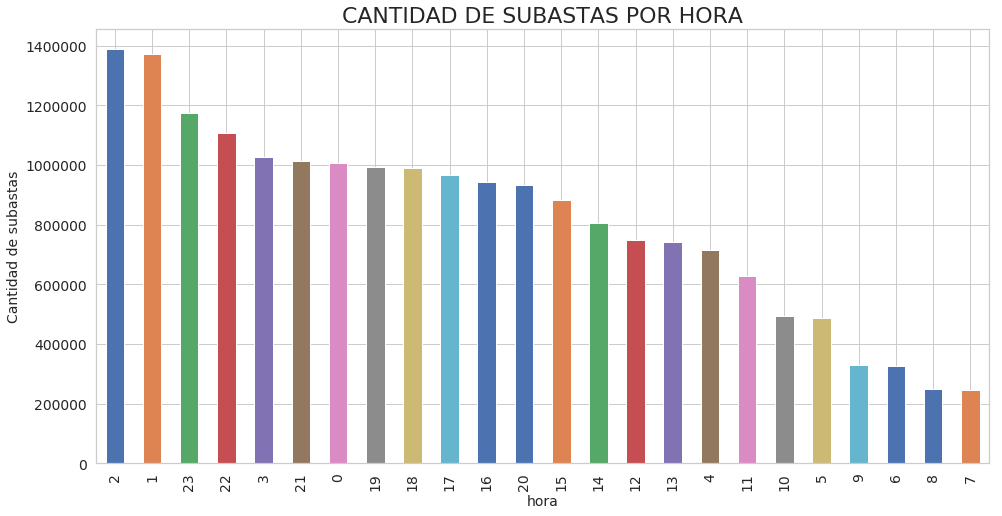

In [54]:
subastas_por_dia = subastas_created.groupby('hora')['fecha'].count().sort_values(ascending=False)

ax = subastas_por_dia.plot(figsize=(16, 8), fontsize=14, kind='bar',)
ax.set_title("CANTIDAD DE SUBASTAS POR HORA", fontsize=22)
ax.set_xlabel("hora",  fontsize=14)
ax.set_ylabel("Cantidad de subastas",fontsize=14)

Text(0,0.5,'Cantidad de subastas')

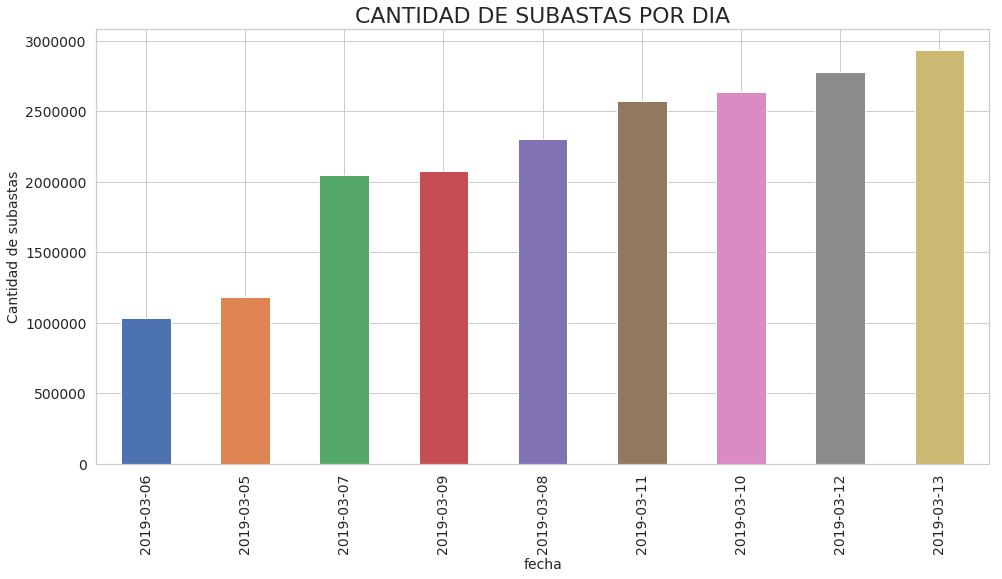

In [55]:
# lo que vamos hacer es ver la cantidad de subastas que se dan en estos dias

subastas_por_dia = subastas_created.groupby('fecha')['date'].count().sort_values(ascending=True)

ax = subastas_por_dia.plot(figsize=(16, 8), fontsize=14, kind='bar',)
ax.set_title("CANTIDAD DE SUBASTAS POR DIA", fontsize=22)
ax.set_xlabel("fecha",  fontsize=14)
ax.set_ylabel("Cantidad de subastas",fontsize=14)

# DATAFRIME::: CLICKS

In [3]:
clicks= pd.read_csv('/home/luichinho/Escritorio/organizacionDeDatos/primer tp datos /clicks.csv.gzip',compression='gzip',low_memory=False)

In [4]:
print(clicks.shape)
clicks.head()

(26351, 20)


,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [4]:
#como podemos notar en este datafrime la columna action_id es null en todo momento, al igual que la columna agent_device y 
#brand  tiene en su mayor momento nill
clicks.isnull().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [45]:
clicks['source_id'].value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

Text(0,0.5,'source ')

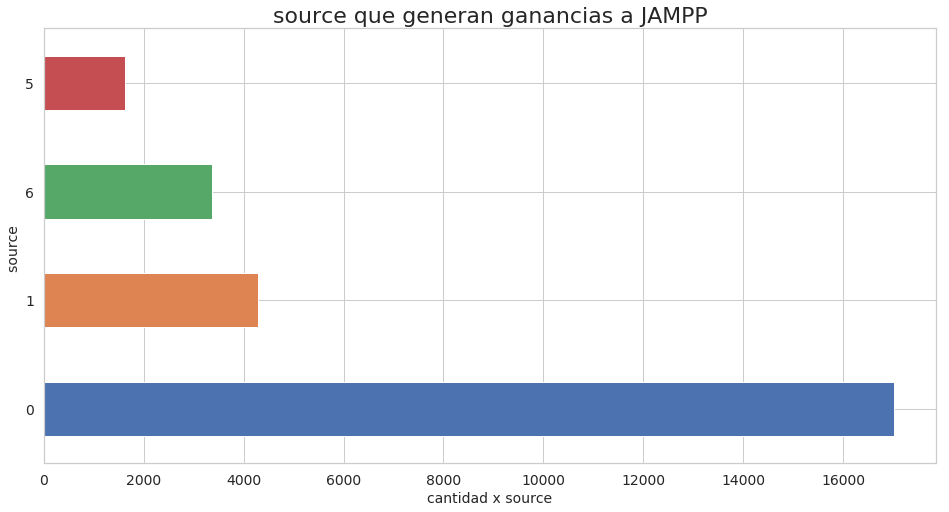

In [23]:
#Analizemos la cantidad de source 

source_id = clicks.groupby('source_id')['created'].count().sort_values(ascending=False)
source_masRelevantes=source_id.head(4)
ax =source_masRelevantes.plot(figsize=(16, 8), fontsize=14, kind='barh')
ax.set_title("source que generan ganancias a JAMPP", fontsize=22)
ax.set_xlabel("cantidad x source",  fontsize=14)
ax.set_ylabel("source ",fontsize=14)


In [6]:
clicks['advertiser_id'].value_counts()

3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

In [35]:
#vamos a crear un nuevo datafrime con las siguientes datos
df_clicks=clicks[['created','timeToClick']]
df_clicks.head()

,created,timeToClick
0,2019-03-06T22:42:12.755Z,1.563
1,2019-03-08T10:24:30.641Z,NaN
2,2019-03-08T15:24:16.069Z,NaN
3,2019-03-06T03:08:51.543Z,19.013
4,2019-03-06T03:32:55.570Z,28.110


In [70]:
df_clicks['created']=pd.to_datetime(df_clicks['created'])
df_clicks.dtypes

/home/luichinho/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


created        datetime64[ns]
timeToClick           float64
fecha                  object
hora                    int64
dtype: object

In [75]:
df_clicks['fecha']=df_clicks['created'].dt.date
df_clicks['dia']=df_clicks['created'].dt.day
df_clicks['hora']=df_clicks['created'].dt.hour
df_clicks.head()

/home/luichinho/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/luichinho/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/luichinho/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,created,timeToClick,fecha,hora,dia
0,2019-03-06 22:42:12.755,1.563,2019-03-06,22,6
1,2019-03-08 10:24:30.641,NaN,2019-03-08,10,8
2,2019-03-08 15:24:16.069,NaN,2019-03-08,15,8
3,2019-03-06 03:08:51.543,19.013,2019-03-06,3,6
4,2019-03-06 03:32:55.570,28.110,2019-03-06,3,6


In [72]:
df_clicks['fecha'].value_counts()

2019-03-12    5204
2019-03-11    4557
2019-03-10    3966
2019-03-13    3468
2019-03-09    3283
2019-03-07    2989
2019-03-08    2839
2019-03-05      31
2019-03-06      14
Name: fecha, dtype: int64

tomamos el dia com mas clicks y vamos a ver en hora se dan mas clicks

In [105]:

dia_a_consultar=[12]
clicks_en_el_dia=df_clicks[df_clicks['dia'].isin(dia_a_consultar)]
clicks_en_el_dia.head()

,created,timeToClick,fecha,hora,dia
6,2019-03-12 15:17:04.453,NaN,2019-03-12,15,12
14734,2019-03-12 23:08:14.988,NaN,2019-03-12,23,12
14735,2019-03-12 12:57:09.583,NaN,2019-03-12,12,12
21140,2019-03-12 22:53:38.991,NaN,2019-03-12,22,12
21141,2019-03-12 17:19:13.420,279.69,2019-03-12,17,12


Text(0,0.5,'Cantidad de clicks')

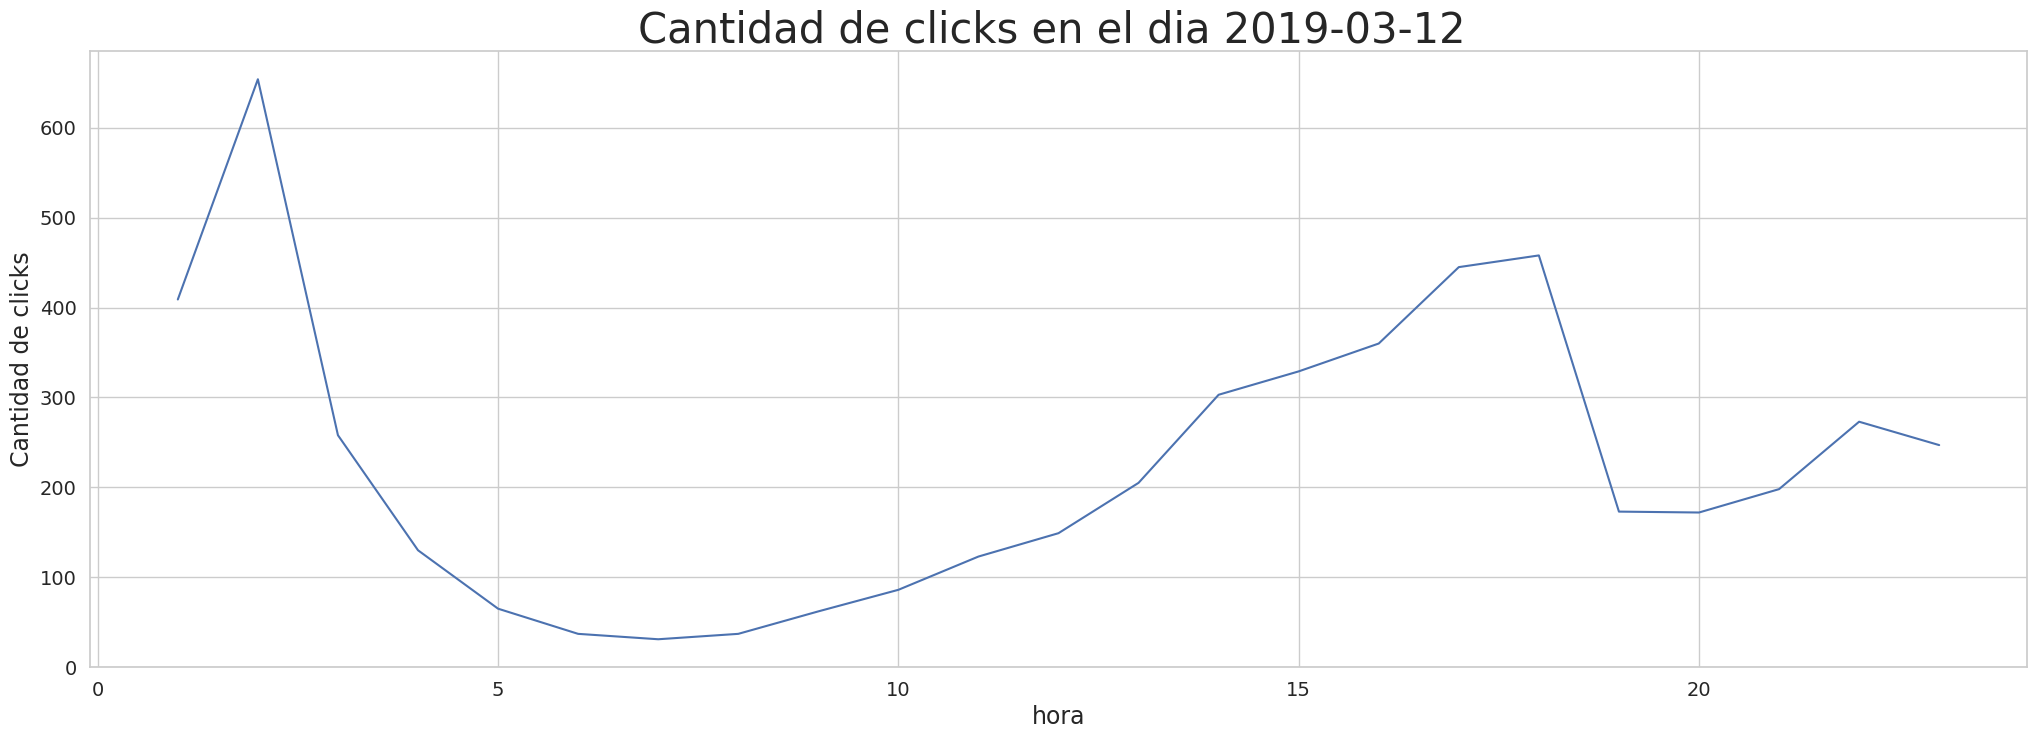

In [103]:

df = clicks_en_el_dia.groupby('hora').count()

ax = df['created'].plot(figsize=(25, 8), fontsize=14, kind='line')
ax.set_title("Cantidad de clicks en el dia 2019-03-12 ", fontsize=30)
ax.set_xlabel("hora",  fontsize=17)
ax.set_ylabel("Cantidad de clicks",fontsize=17)

Text(0,0.5,'hora')

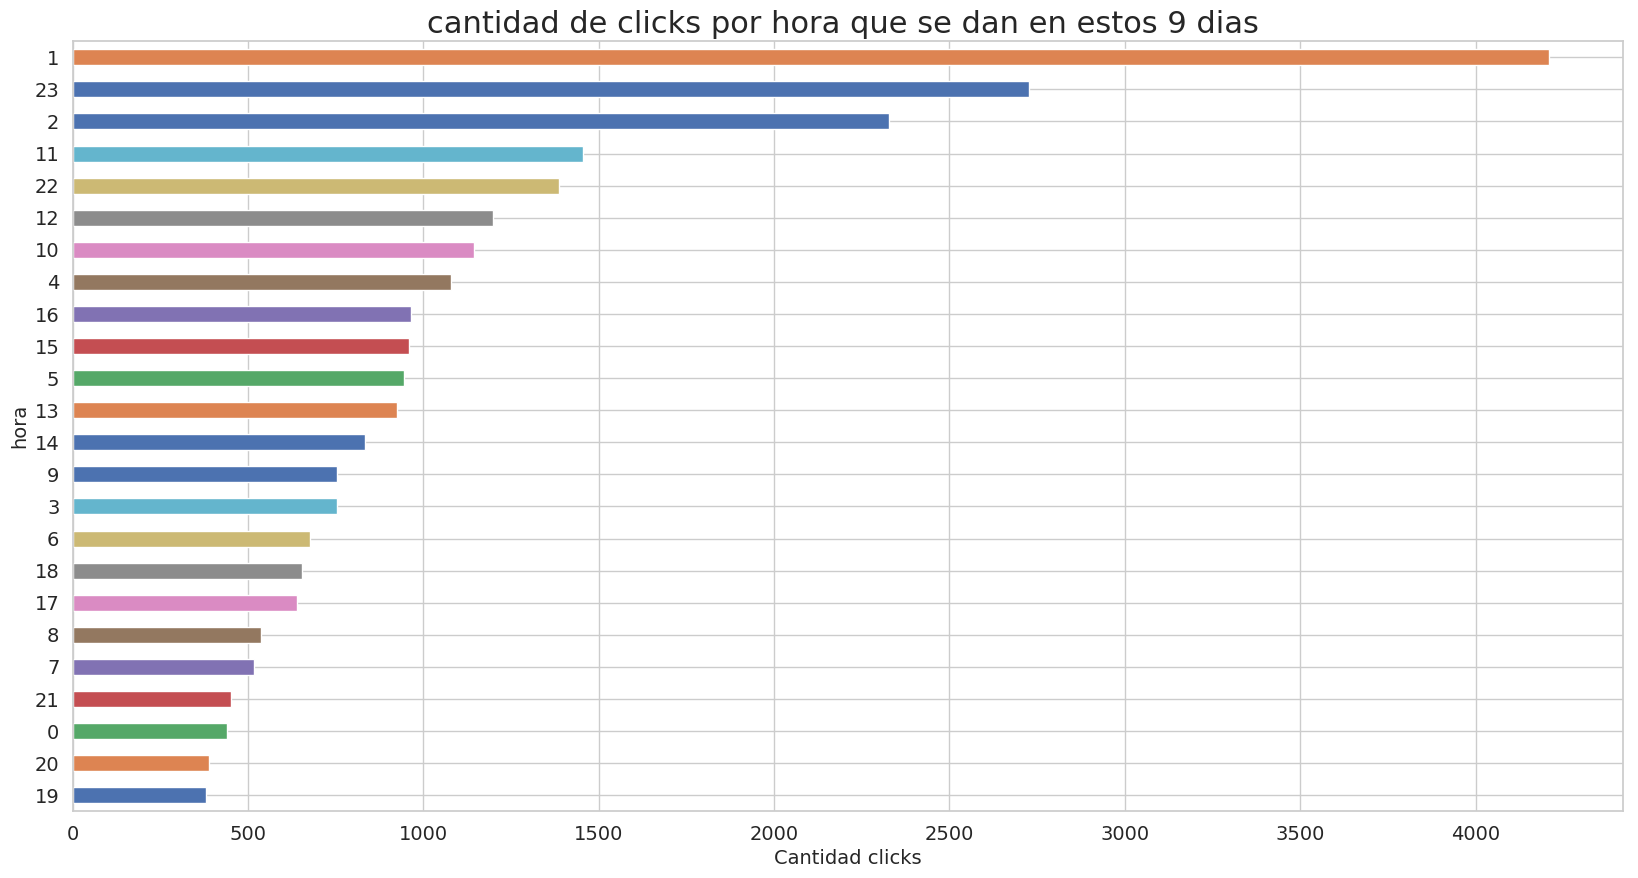

In [110]:
#events['exploradores'] = events['browser_version'].str.replace('\d+', '').str.replace('.', '')
df_browser = df_clicks.groupby('hora')['created'].count().sort_values()
ax = df_browser.plot(figsize=(20, 10), fontsize=14, kind='barh')
ax.set_title("cantidad de clicks por hora que se dan en estos 9 dias ", fontsize=22)
ax.set_xlabel("Cantidad clicks",  fontsize=14)
ax.set_ylabel("hora",fontsize=14)

# DATAFRIME::: EVENTS

In [5]:
events = pd.read_csv('/home/luichinho/Escritorio/organizacionDeDatos/primer tp datos /events.csv.gzip',compression='gzip',low_memory=False)

In [75]:
print(events.shape)
events.head()

(2494423, 22)


,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [15]:
#vamos a ver que tipo de coneccion se uso a la hora de realizar el evento
#y ver cual fue el mas usado 
events['connection_type'].value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

Text(0,0.5,'CANTIDAD DE EVENTOS')

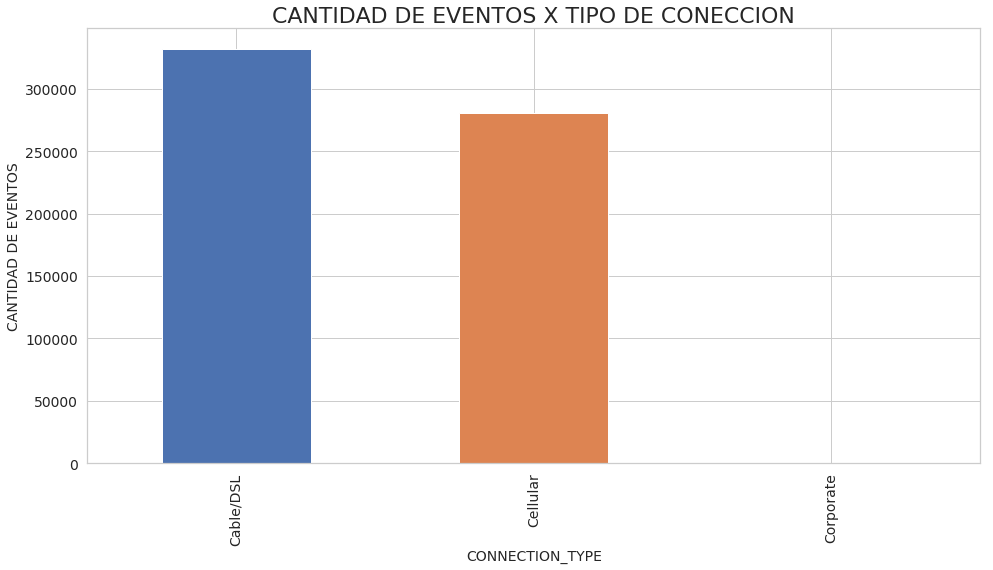

In [18]:
df_coneccion = events.groupby('connection_type')['date'].count().sort_values(ascending=False)

#trabajamos con los 10 modelos mas vendidos
#df_marca_top=df_marca.head(1)

ax = df_coneccion.plot(figsize=(16, 8), fontsize=14, kind='bar',)
ax.set_title("CANTIDAD DE EVENTOS X TIPO DE CONECCION", fontsize=22)
ax.set_xlabel("CONNECTION_TYPE",  fontsize=14)
ax.set_ylabel("CANTIDAD DE EVENTOS",fontsize=14)

In [76]:

events['ref_type'].value_counts()

1891515180541284343    1882743
1494519392962156891     611680
Name: ref_type, dtype: int64

In [77]:
#vamos a ver cuantos eventos son atrubuidos  a jampp
events['attributed'].value_counts()

False    2489324
True        5099
Name: attributed, dtype: int64

In [35]:
atribuidas=[True]

In [36]:
df=events[['date','event_id','application_id','attributed','ref_hash']]

df_jampp_atribuidas=dt[dt['attributed'].isin(atribuidas)]

In [37]:
df_jampp_atribuidas.head()

,date,event_id,application_id,attributed,ref_hash
11150,2019-03-05 23:16:11.077,80,7,True,2909944438712426584
11151,2019-03-05 23:16:03.190,1,7,True,2909944438712426584
11152,2019-03-05 23:16:04.884,81,7,True,2909944438712426584
31408,2019-03-09 19:20:17.457,133,56,True,1025168038698142185
31482,2019-03-08 18:30:58.191,133,56,True,591843512523094189


In [38]:
df_jampp_atribuidas['event_id'].value_counts().head()

31     1556
513    1004
156     584
155     398
158     294
Name: event_id, dtype: int64

Text(0,0.5,'events ')

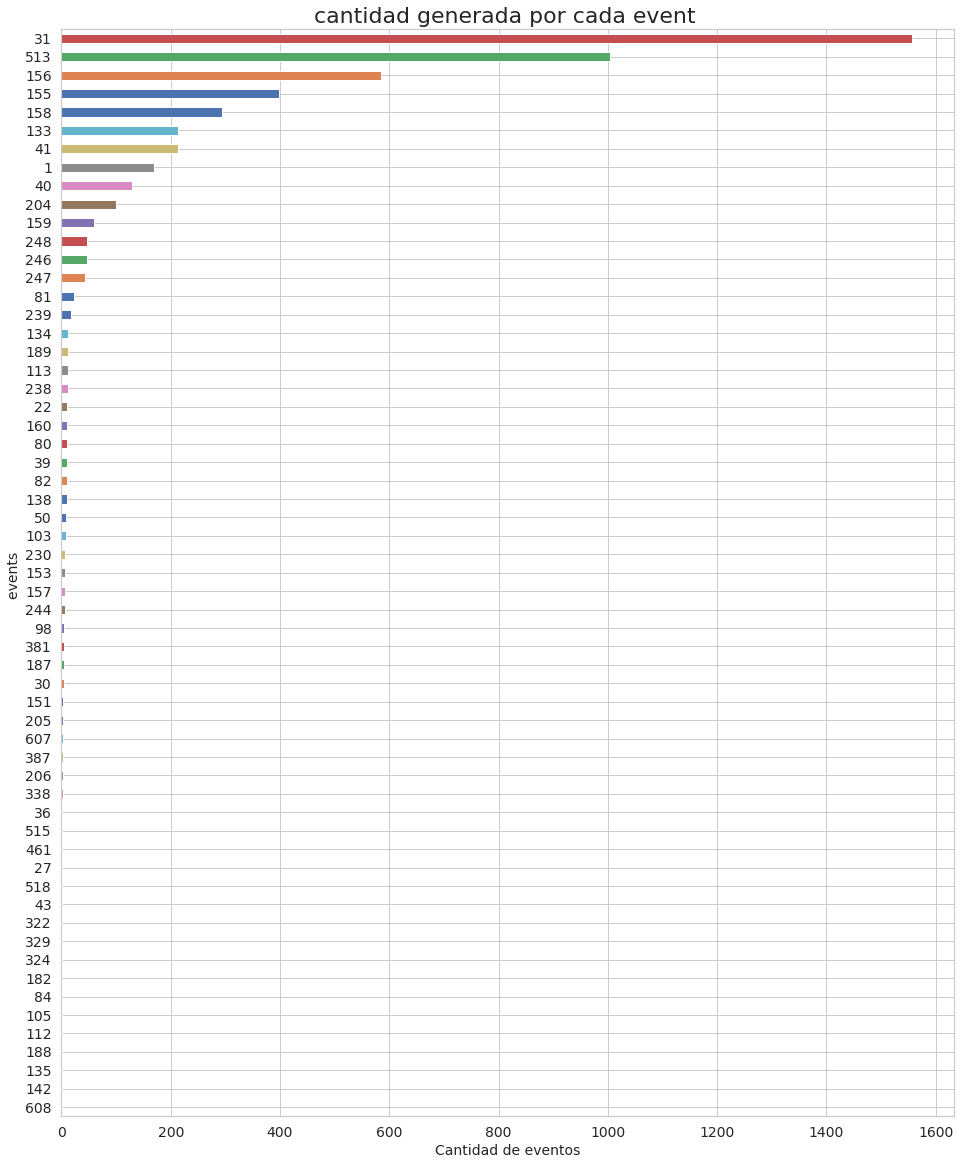

In [47]:

df_event = df_jampp_atribuidas.groupby('event_id')['date'].count().sort_values()

ax = df_event.plot(figsize=(16, 20), fontsize=14, kind='barh')
ax.set_title("cantidad generada por cada event ", fontsize=22)
ax.set_xlabel("Cantidad de eventos",  fontsize=14)
ax.set_ylabel("events ",fontsize=14)

In [14]:
dt_jampp_atribuidas['application_id'].value_counts().head()

63     2323
16     1219
45      431
170     323
102     150
Name: application_id, dtype: int64

In [ ]:
events.isnull().sum()

# DATAFRIME;;;; INSTALL

In [26]:
installs=pd.read_csv('/home/luichinho/Escritorio/organizacionDeDatos/primer tp datos /installs.csv.gzip',compression='gzip',low_memory=False)

In [61]:
print(installs.shape)
installs.head()

(3412, 18)


,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [62]:
installs.isnull().sum()

created                  0
application_id           0
ref_type                 0
ref_hash                 0
click_hash            3412
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [9]:
clicks['ref_type'].value_counts()

1891515180541284343    25549
1494519392962156891      739
5016171802147987303       58
6323871695571587575        5
Name: ref_type, dtype: int64

In [63]:
#vamos a ver cuantas veces hizo una instalacion un mismo usuario
installs['ref_hash'].value_counts().head()

5208834946313176321    4
3272750442824629569    4
1999001885916451618    3
2457547163021424058    3
2515049144505739996    3
Name: ref_hash, dtype: int64

ANALISIS: SOBRE POSIBLE FRAUDE A LA HORA DE INSTALAR UNA APP

In [22]:
#vamos  ver si dichos usuarios el lapso de tiempo de dichas instalaciones
usuarios=[5208834946313176321,3272750442824629569,1999001885916451618]

In [26]:
nuevo=installs[['created','ref_hash']]
nuevo.head()

,created,ref_hash
0,2019-03-13 01:43:33.445,8464844987297247076
1,2019-03-13 04:58:35.078,3250564871270161533
2,2019-03-13 04:20:57.666,7953318831018100268
3,2019-03-13 04:20:57.698,7953318831018100268
4,2019-03-10 22:24:56.684,8355110941557237501


In [47]:
instalaciones=nuevo[nuevo['ref_hash'].isin(usuarios)]

In [48]:
instalaciones
#lo que estamos viendo es ver instalaciones que pueden llevar al fraude,ya que suele pasar en la vida real(instalaciones dudosas) 
#por ello se hizo este analisis 

,created,ref_hash
116,2019-03-11 22:39:08.026,5208834946313176321
119,2019-03-11 22:39:42.291,5208834946313176321
886,2019-03-05 17:05:49.670,3272750442824629569
887,2019-03-05 17:05:53.778,3272750442824629569
2175,2019-03-05 17:03:33.728,3272750442824629569
2177,2019-03-05 17:03:26.724,3272750442824629569
2446,2019-03-09 04:09:14.718,1999001885916451618
2447,2019-03-09 04:11:11.945,1999001885916451618
3105,2019-03-12 00:23:46.334,5208834946313176321
3106,2019-03-12 00:23:18.016,5208834946313176321


In [69]:
#vamos a ver si al instalar una app se hizo el uso de la red de wife
installs['wifi'].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

como podemos notar en el dateFrime la mayor parte de las instalaciones se hizo  la red wifi

In [71]:
installs['attributed'].value_counts()
# a simple viste podemos ver que ninguna instalacion se le es atribuida a jampp

False    3412
Name: attributed, dtype: int64

In [73]:
installs['implicit'].value_counts()

False    2547
True      865
Name: implicit, dtype: int64

In [28]:
# top ten de las marcas mas utilizadas por los instaladores
installs['device_brand'].value_counts().head(10)

3.083059e+17    472
2.208835e+18    185
2.523246e+18    116
5.951325e+18     72
2.987569e+18     40
3.812621e+18     37
5.137992e+17     34
6.538562e+18     26
3.228516e+18      9
1.083369e+18      9
Name: device_brand, dtype: int64